<a href="https://colab.research.google.com/github/lukaszplust/Projects/blob/main/Heart_diseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
%%bash
wget -q https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/datasets/heart.csv

In [44]:
df = pd.read_csv('heart.csv')

In [14]:
#count -> mowi o tym ile wartości nie jest równa NULL, więc jesli count = len(df) => wszystkie dane są

# cp -> chest pain type 4 (values)

#testbps -> spoczynkowe cisnienie krwi

#chol -> cholesterol

#fbs -> cukier we krwi nadczo

#restecg -> spoczynkowe EKG

#thalach -> maksymalne tentno

# exang -> dusznosc podczas wynisłku (1 = tak, 0 = nie)
df[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [45]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [48]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [13]:
len(df)

303

In [12]:
df.describe().apply(lambda x: round(x,2)).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.97,1.03,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


In [15]:
data = df.copy()

target = data['target']

In [19]:
del data['target']

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [24]:
X_train.shape

(227, 13)

In [25]:
X_test.shape

(76, 13)

In [90]:
classifier = DecisionTreeClassifier(max_depth = 10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [91]:
classifier.score(X_test, y_test)

0.7894736842105263

In [33]:
#do predykcji daje te dane których model nie widział
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

USING ACCURACY SCORE !!

In [36]:
#y_test -> targety rzeczywiste ktore wystapiły (model ich nie widział), y_pred -> przwidziane na podstawie modelu
accuracy_score(y_test, y_pred)

0.7894736842105263

DECISION TREE GRAPHICAL !!

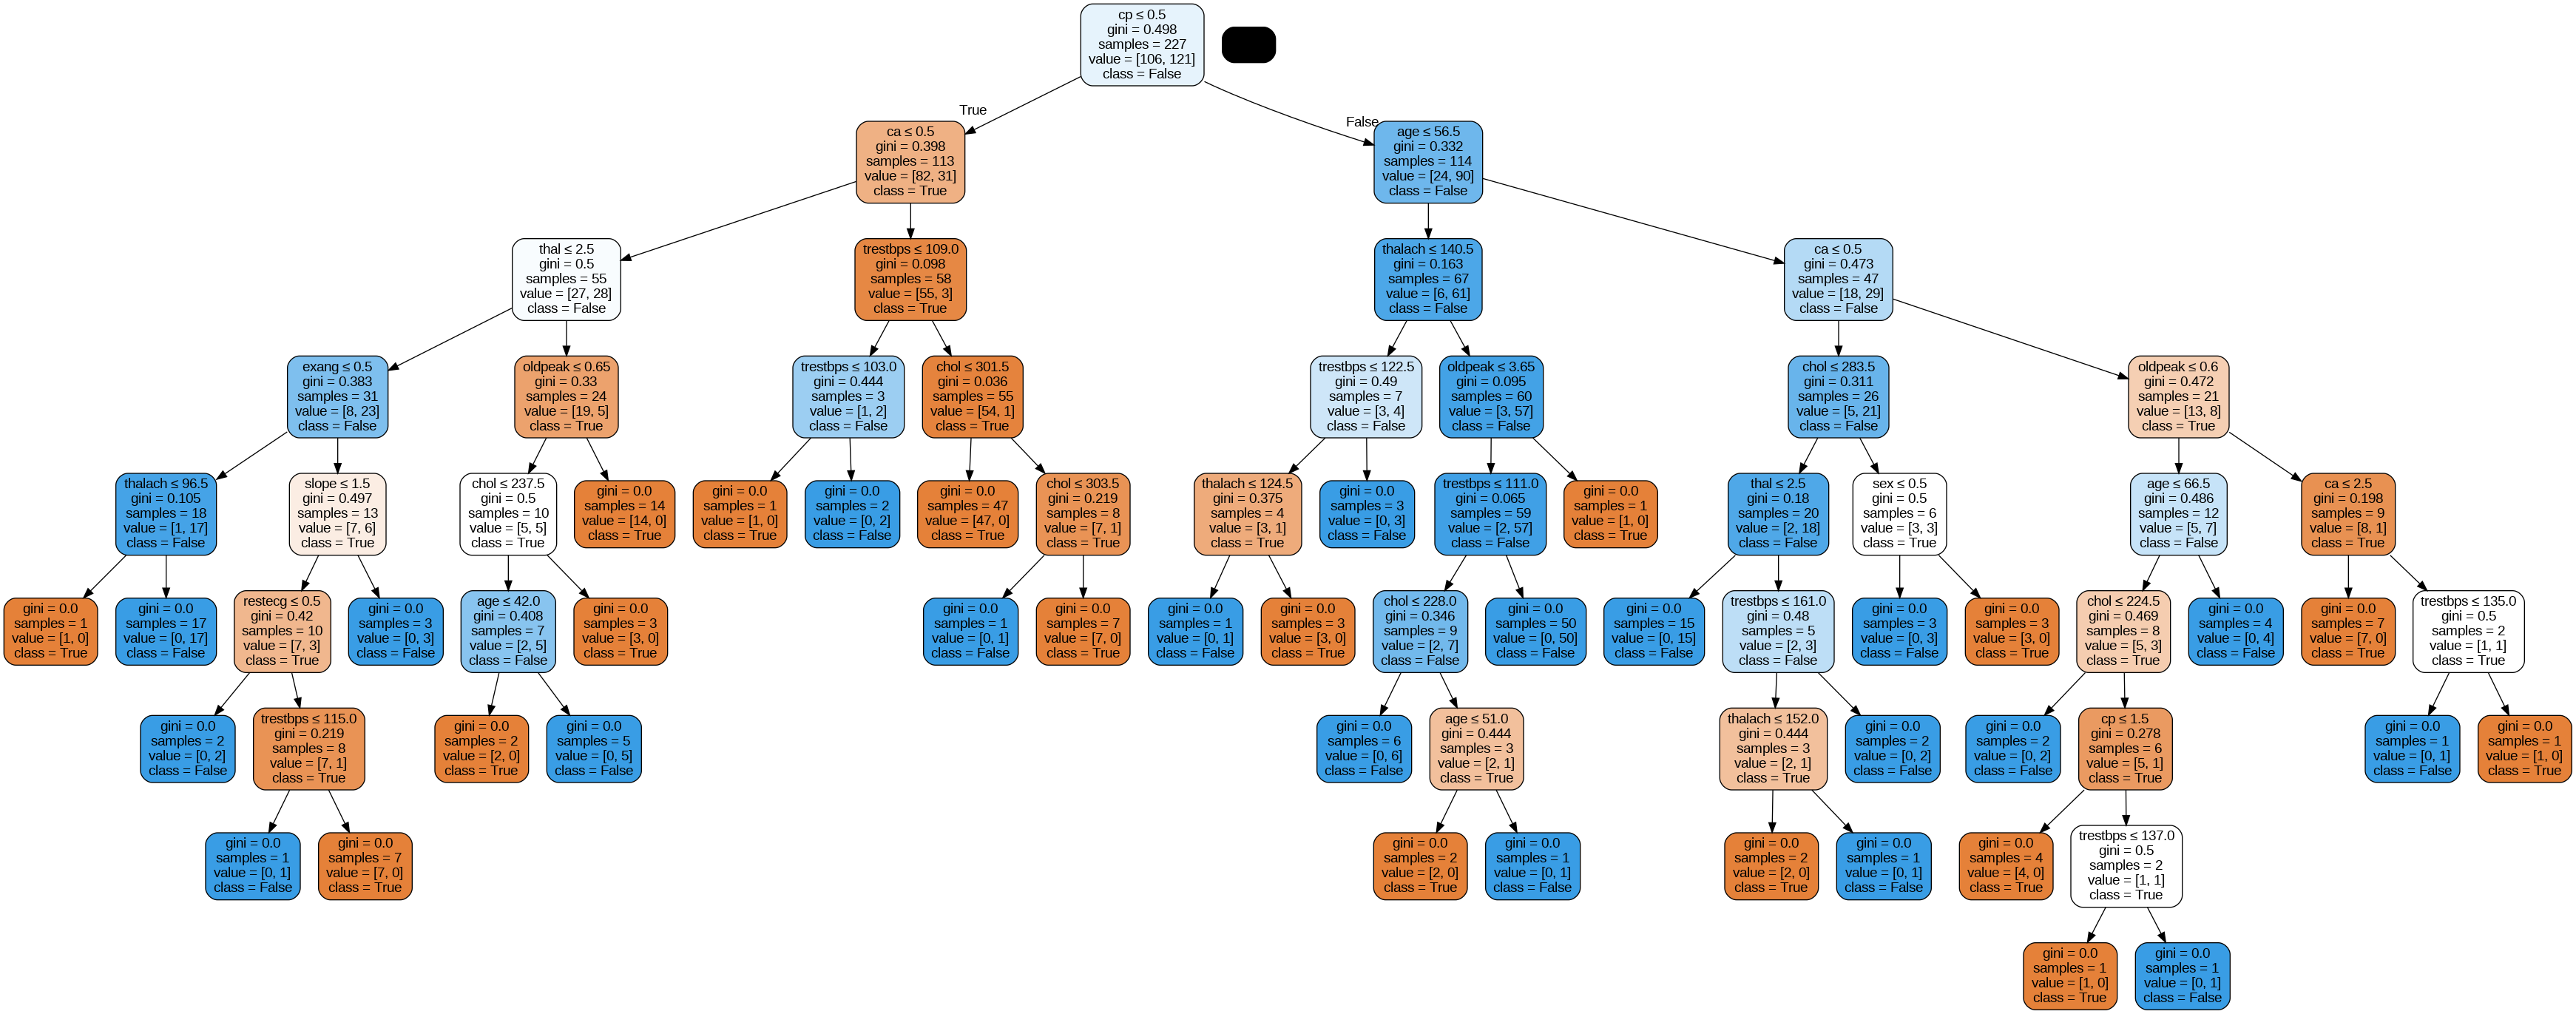

In [50]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=df.columns[:-1],
               class_names=['True', 'False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

Zastosowanie Grid Search CV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#tego będę używał do określenia best max_depth
from sklearn.tree import DecisionTreeClassifier

model = SVC()

param_grid = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'rbf','poly', 'sigmoid'],
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

#Dopasowanie do modelu danych treningowych
grid_search.fit(X_train, y_train)

# Wyswietlenie najlepszych parametrów

print("Best parameters:", grid_search.best_params_)


# Ocena modelu na danych testowych
accuracy = grid_search.score(X_test, y_test)
#print("Dokładność modelu:", accuracy)


# DODATKOWO SZUKAM NAJLEPSZEGO MAX_DEPTH

model_classifier = DecisionTreeClassifier()

param_classifier = {'max_depth': [3, 5, 7],
                    'min_samples_leaf': [1, 2, 3],
                    'max_features': [None, 'sqrt', 'log2'],
                    'min_samples_split': [2,5,10]
                    }
grid_search_classifier = GridSearchCV(estimator=model_classifier, param_grid=param_classifier, cv=5)

#grid_search_max_depth = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search_classifier.fit(X_train, y_train)
best_classifier = grid_search_classifier.best_params_
print("Best tree classifier: ", best_classifier)
#print("Best accuracy using tree classifier: ", grid_search_classifier.best_score_)
# KOMENTARZ ODNOSNIE KERNELA

# 'linear': Jądro liniowe, które jest podstawowym jądrem SVM i stosuje się do danych liniowo separowalnych.

# 'poly': Jądro wielomianowe, które jest stosowane do danych, które nie są liniowo separowalne. Parametr stopnia degree określa stopień wielomianu.

# 'rbf' (radial basis function): Jądro radialne, znane również jako Gaussowskie jądro. Jest to popularne jądro stosowane do nieliniowych danych. Parametr gamma kontroluje wpływ pojedynczego punktu danych na kształt granicy decyzyjnej.

# 'sigmoid': Jądro sigmoidalne, które jest funkcją sigmoidalną i często stosuje się w problemach binarnej klasyfikacji. Parametry gamma i coef0 kontrolują kształt granicy decyzyjnej.

# 'precomputed': To jądro pozwala na korzystanie z wstępnie obliczonych macierzy podobieństwa jako danych wejściowych. W tym przypadku, zamiast przekazywać macierz cech, przekazujemy macierz podobieństwa między punktami danych.


# DLA CLASSIFIER


# max_depth: Maksymalna głębokość drzewa. Możliwe wartości to liczby całkowite lub None (bez ograniczenia głębokości).

# min_samples_split: Minimalna liczba próbek wymagana do podziału węzła. Możliwe wartości to liczby całkowite lub ułamki.

# min_samples_leaf: Minimalna liczba próbek wymagana do utworzenia liścia. Możliwe wartości to liczby całkowite lub ułamki.

# max_features: Maksymalna liczba cech brana pod uwagę podczas poszukiwania najlepszego podziału. Możliwe wartości to liczby całkowite, ułamki lub wartości specjalne takie jak "sqrt" (pierwiastek z liczby cech) lub "log2" (logarytm o podstawie 2 z liczby cech).


Best parameters: {'C': 1, 'kernel': 'linear'}
Best tree classifier:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


Testing data with best parameteres

In [86]:
classifier = DecisionTreeClassifier(max_depth = 3, max_features='sqrt', min_samples_leaf=1, min_samples_split=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=5)

In [87]:
classifier.score(X_test, y_test)

0.8157894736842105